In [19]:
import warnings
warnings.filterwarnings('ignore')#忽略一些警告
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# jupter内部使用
%matplotlib inline

In [72]:
data = pd.read_csv('cleaned_house_dataset.csv', header=0)

In [73]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.info()
# RangeIndex: 9200 entries, 0 to 9199
# Data columns (total 19 columns):
#  #   Column         Non-Null Count  Dtype  
# ---  ------         --------------  -----  
#  0   date           9200 non-null   object 
#  1   price          9200 non-null   float64
#  2   bedrooms       9200 non-null   float64
#  3   bathrooms      9200 non-null   float64
#  4   sqft_living    9200 non-null   int64  
#  5   sqft_lot       9200 non-null   int64  
#  6   floors         9200 non-null   float64
#  7   waterfront     9200 non-null   int64  
#  8   view           9200 non-null   int64  
#  9   condition      9200 non-null   int64  
#  10  sqft_above     9200 non-null   int64  
#  11  sqft_basement  9200 non-null   int64  
#  12  yr_built       9200 non-null   int64  
#  13  yr_renovated   9200 non-null   int64  
#  14  street         9200 non-null   object 
#  15  city           9200 non-null   object 
#  16  statezip       9200 non-null   object 
#  17  country        9200 non-null   object 
#  18  log_price      9200 non-null   float64
# dtypes: float64(5), int64(9), object(5)
#将yr_built和yr_renovated转换为int类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9200 non-null   object 
 1   price          9200 non-null   float64
 2   bedrooms       9200 non-null   float64
 3   bathrooms      9200 non-null   float64
 4   sqft_living    9200 non-null   int64  
 5   sqft_lot       9200 non-null   int64  
 6   floors         9200 non-null   float64
 7   waterfront     9200 non-null   int64  
 8   view           9200 non-null   int64  
 9   condition      9200 non-null   int64  
 10  sqft_above     9200 non-null   int64  
 11  sqft_basement  9200 non-null   int64  
 12  yr_built       9200 non-null   int64  
 13  yr_renovated   9200 non-null   int64  
 14  street         9200 non-null   object 
 15  city           9200 non-null   object 
 16  statezip       9200 non-null   object 
 17  country        9200 non-null   object 
 18  log_pric

In [ ]:
#数据处理
data['log_price'] = np.log(data['price'])
data["yr_after_renovated"] = data['date'].dt.year - data['yr_renovated']
#遍历所有yr_after_renovated的值，如果yr_after_renovated大于1000,则设置为date的年份-yr_built
for i in range(len(data)):
    if data['yr_after_renovated'][i] > 1000:
        data['yr_after_renovated'][i] = data['date'].dt.year[i] - data['yr_built'][i]
data['yr_after_built'] = data['date'].dt.year - data['yr_built']
data['price_per_sqft'] = data['price'] / data['sqft_living']
#binary variables
data['basement_present'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
data['if_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
#生成if_waterfront的值，如果waterfront大于0,则设置为1，否则设置为0'
data['if_waterfront'] = data['waterfront'].apply(lambda x: 1 if x > 0 else 0)
data['basement_ratio'] = data['sqft_basement'] / data['sqft_living']
data['sqft_above_ratio'] = data['sqft_above'] / data['sqft_living']
data['rooms'] = data['bedrooms'] + data['bathrooms']

#对bedrooms、bathrooms、floors进行binning处理，分为1-2, 3-4, 5+三个区间,数值为0,1,2
data['bedrooms_bin'] = pd.cut(data['bedrooms'], bins=[0, 2, 4, 10], labels=['1-2', '3-4', '5+'])
data['bathrooms_bin'] = pd.cut(data['bathrooms'], bins=[0, 1, 3, 10], labels=['1', '2-3', '4+'])
data['floors_bin'] = pd.cut(data['floors'], bins=[0, 1, 2, 10], labels=['1', '2', '3+'])
#对yr_built进行binning处理，分为1900-1950, 1951-2000, 2001+三个区间,数值为0,1,2
data['yr_built_bin'] = pd.cut(data['yr_built'], bins=[1900, 1950, 2000, 2023], labels=['1900-1950', '1951-2000', '2001+'])
#对yr_renovated进行binning处理，分为0-10, 11-20, 21+三个区间,数值为0,1,2
data['yr_renovated_bin'] = pd.cut(data['yr_renovated'], bins=[0, 10, 20, 100], labels=['0-10', '11-20', '21+'])
#对sqft_living，sqft_above，sqft_basement进行对数处理
data['log_sqft_living'] = np.log(data['sqft_living'])
data['log_sqft_above'] = np.log(data['sqft_above'])
data['log_sqft_basement'] = np.log(data['sqft_basement'] + 1)

In [79]:
#输出数据集
data.to_csv('processed_house_dataset.csv', index=False)

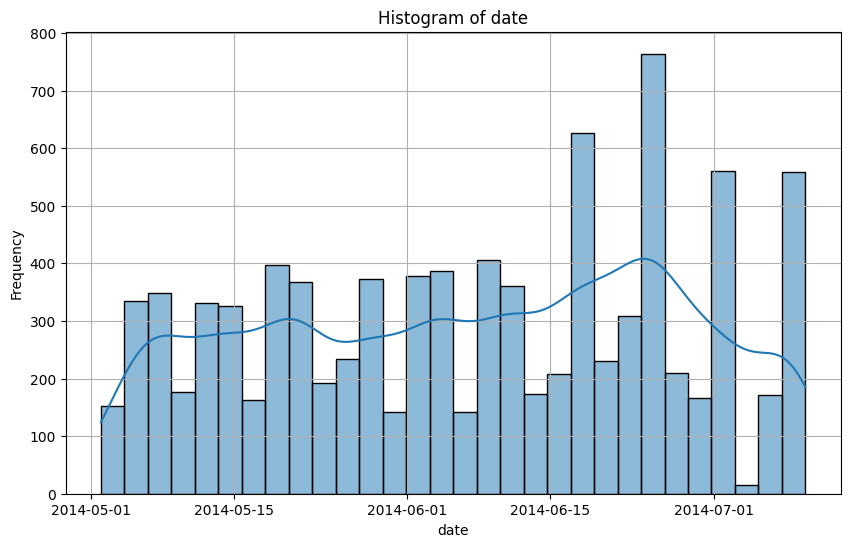

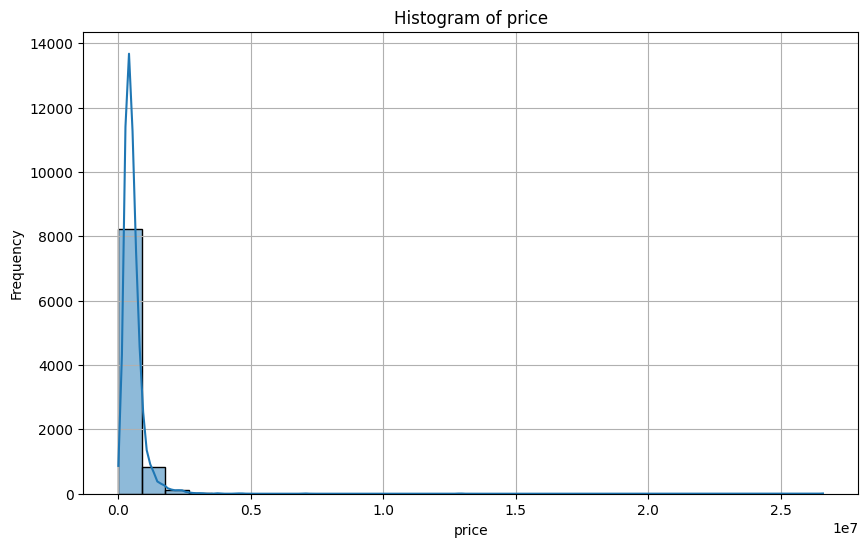

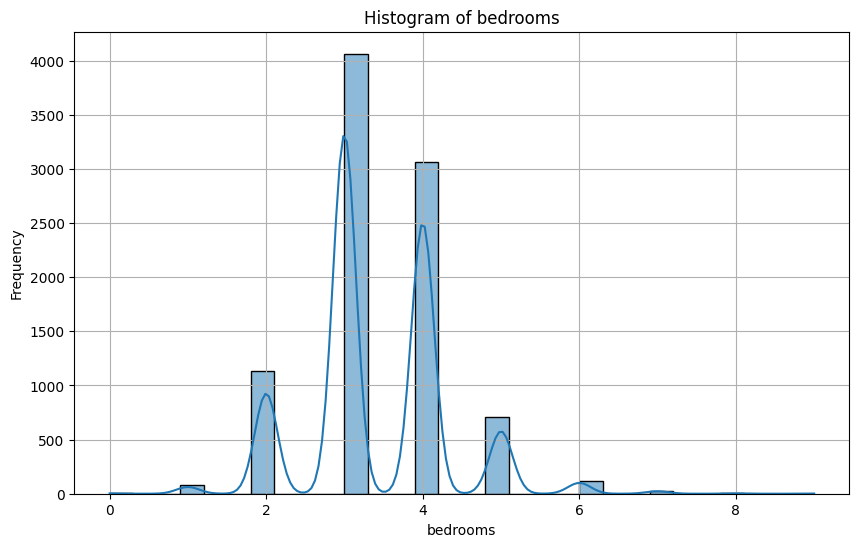

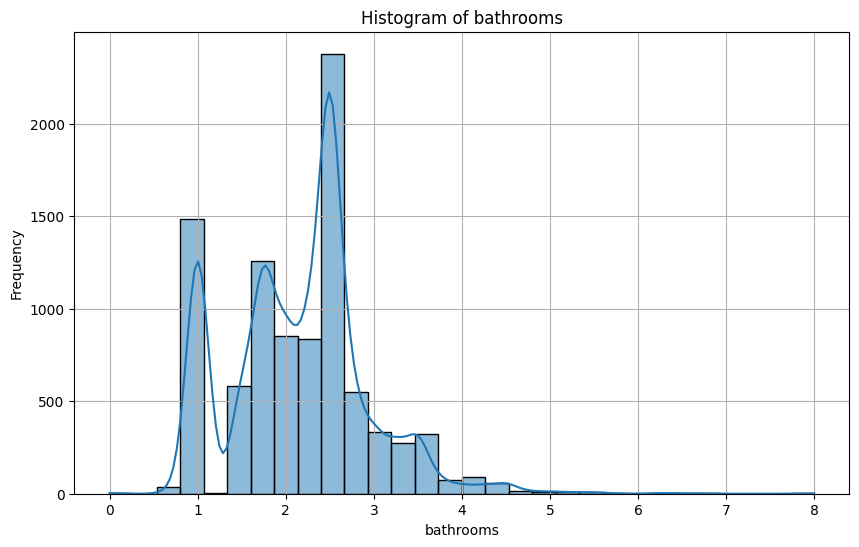

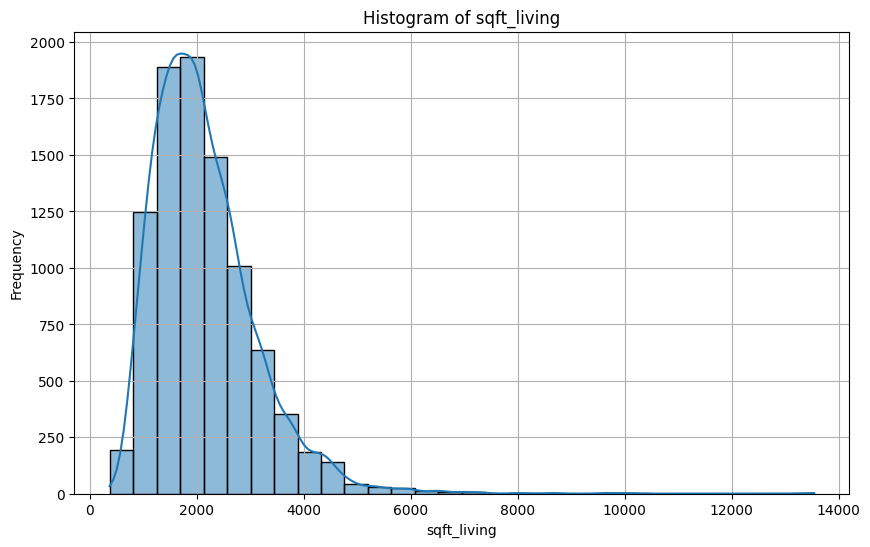

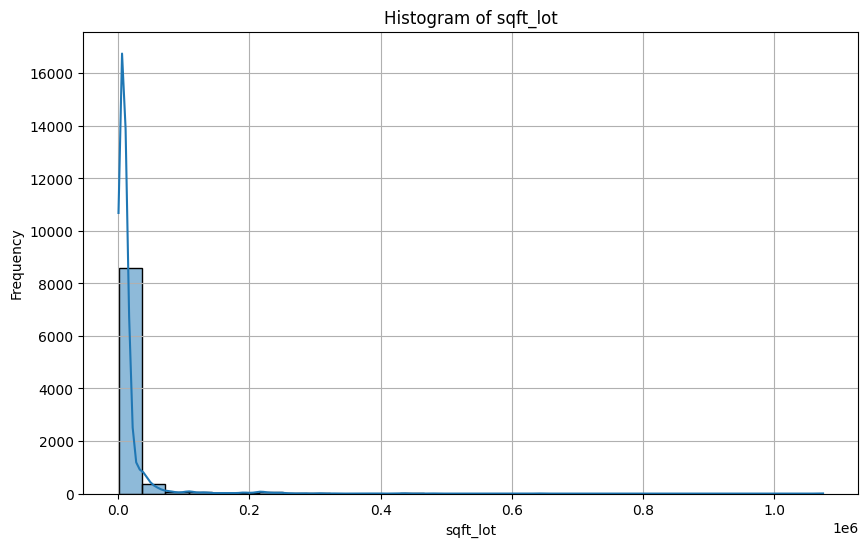

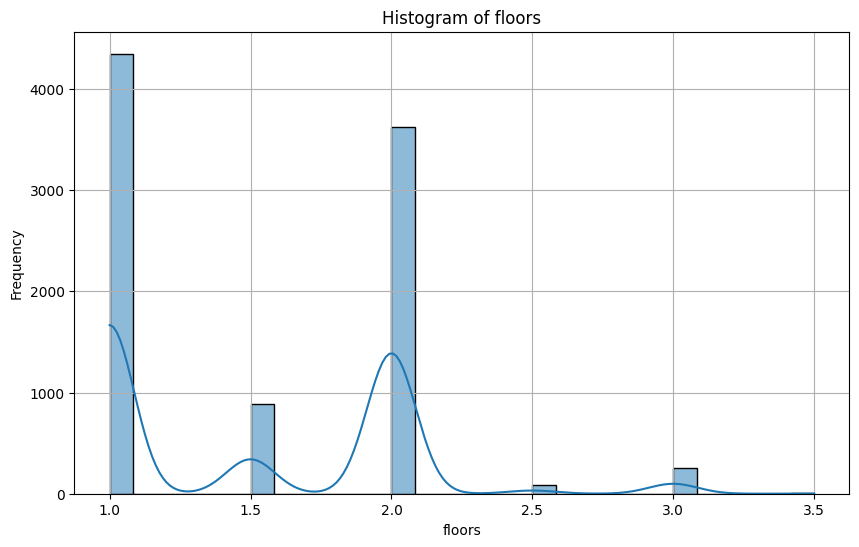

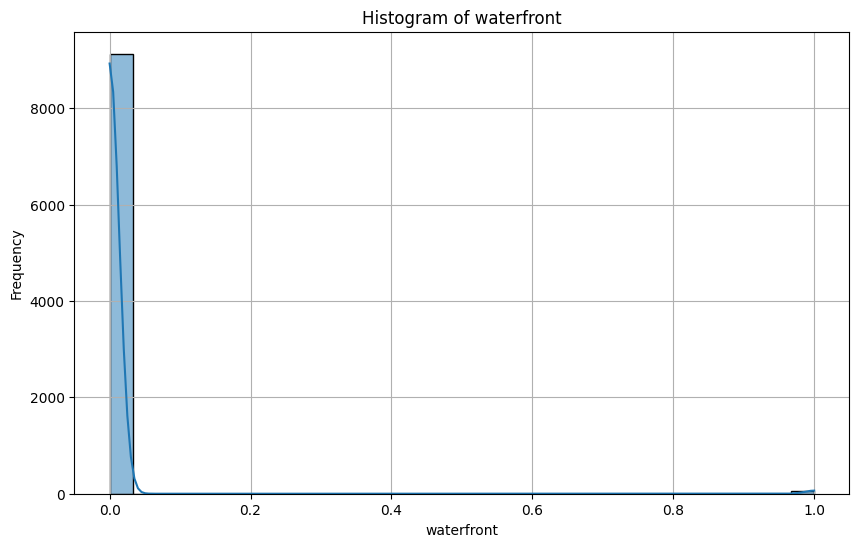

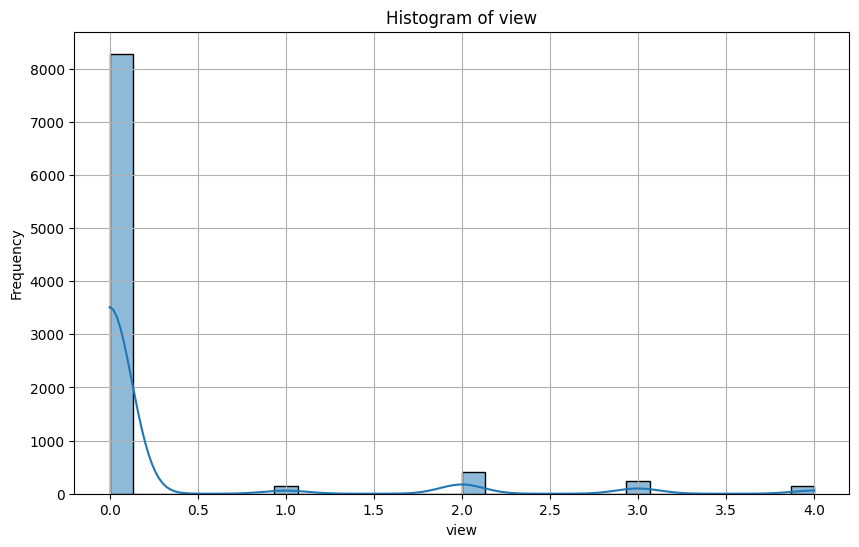

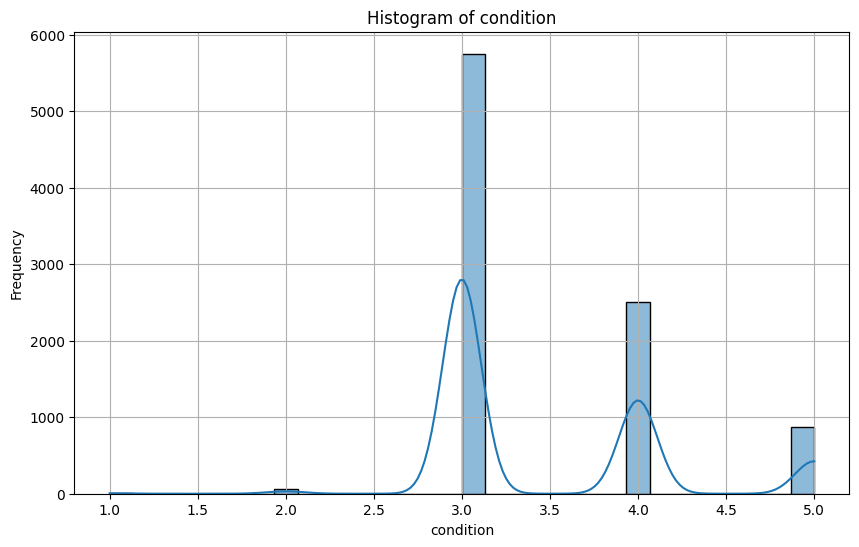

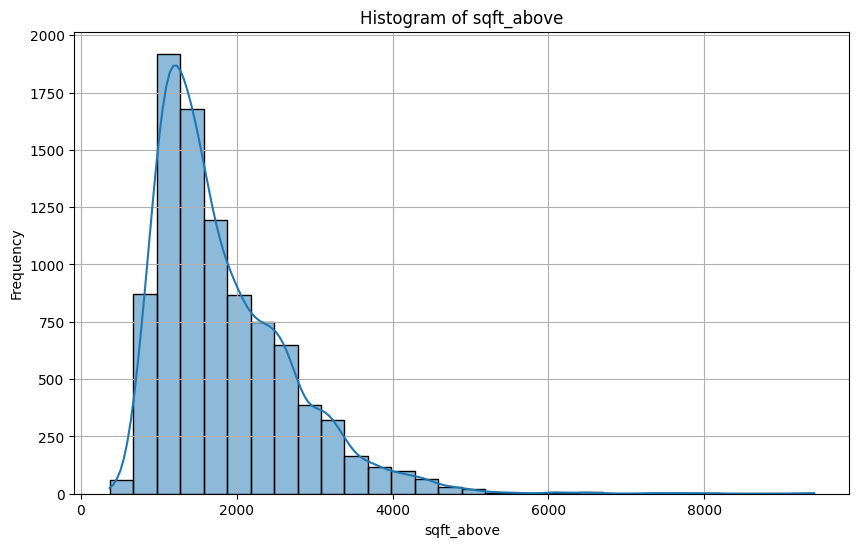

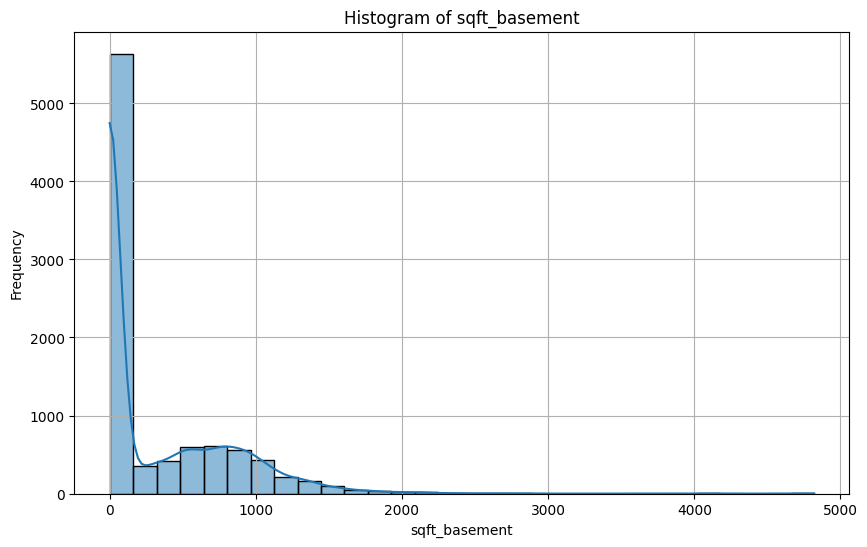

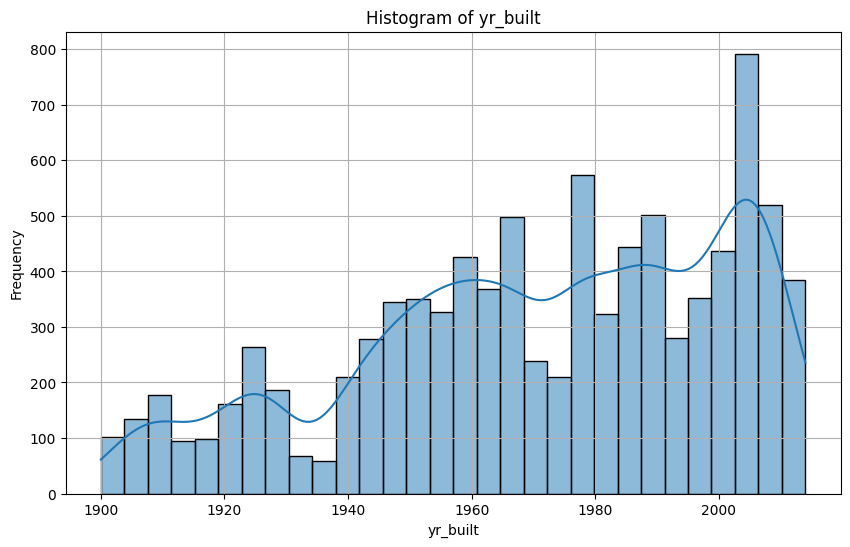

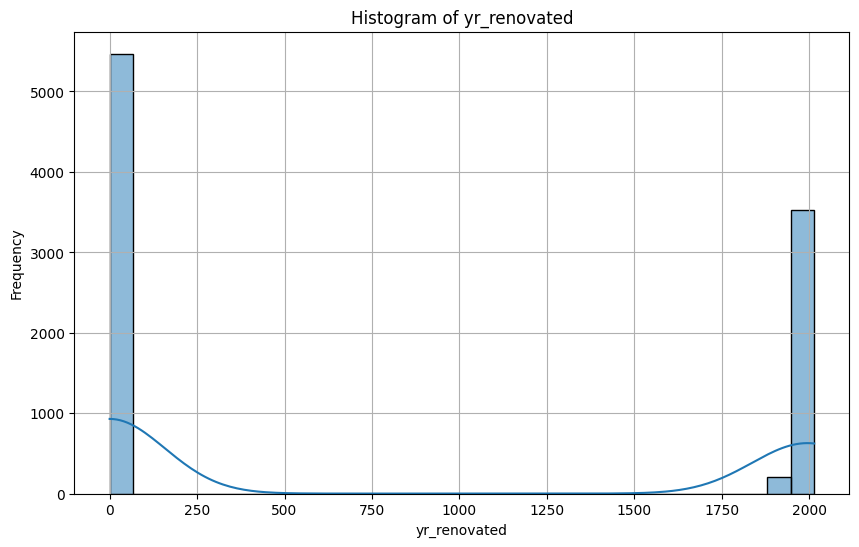

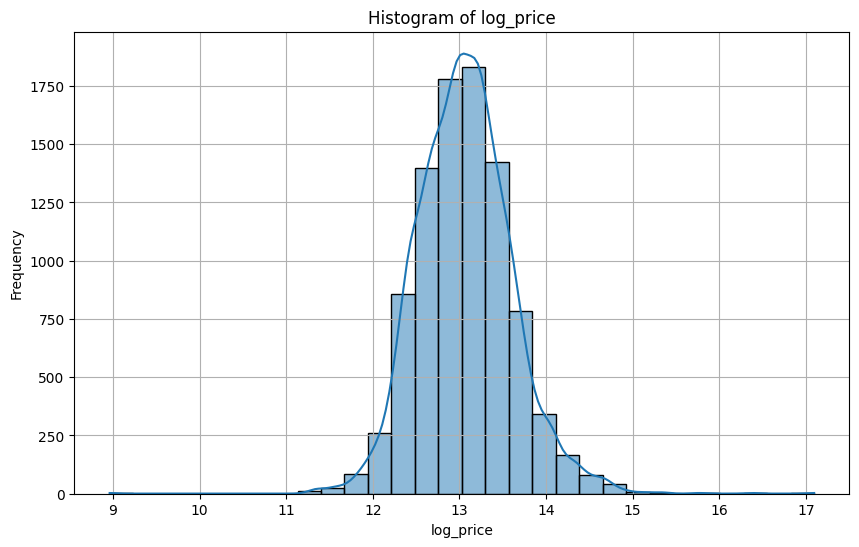

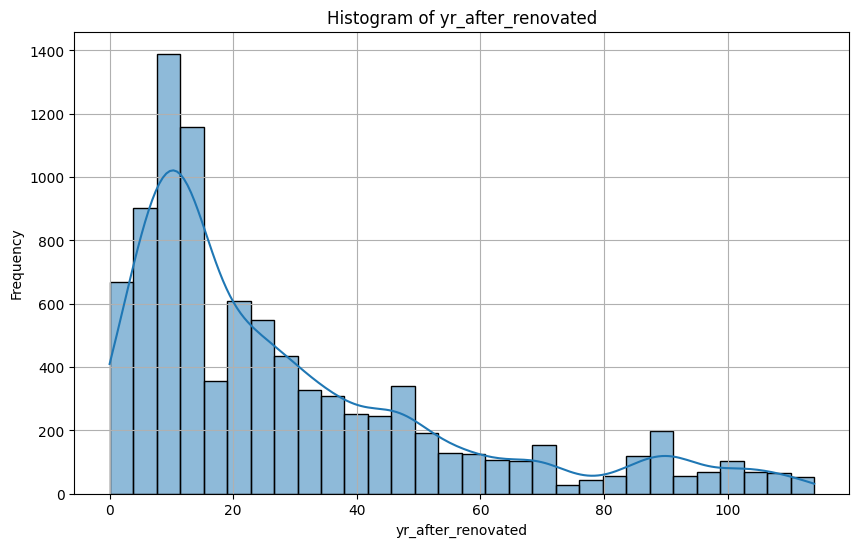

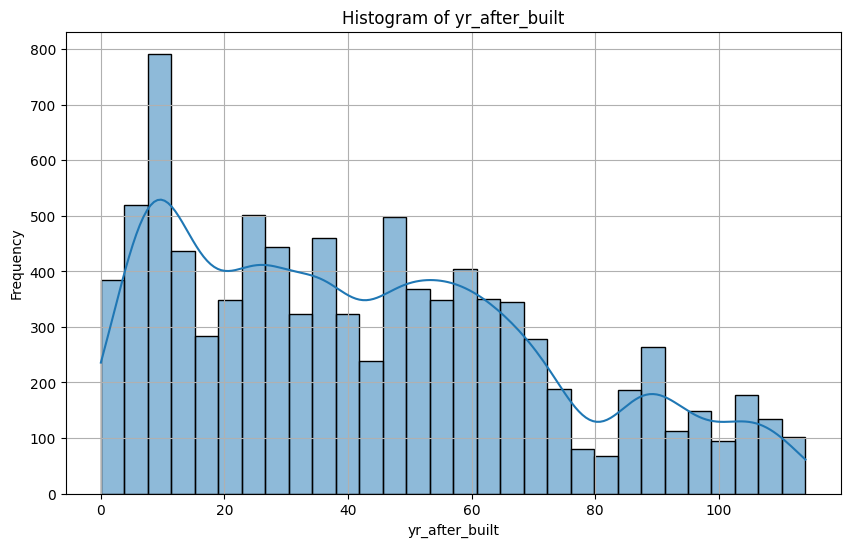

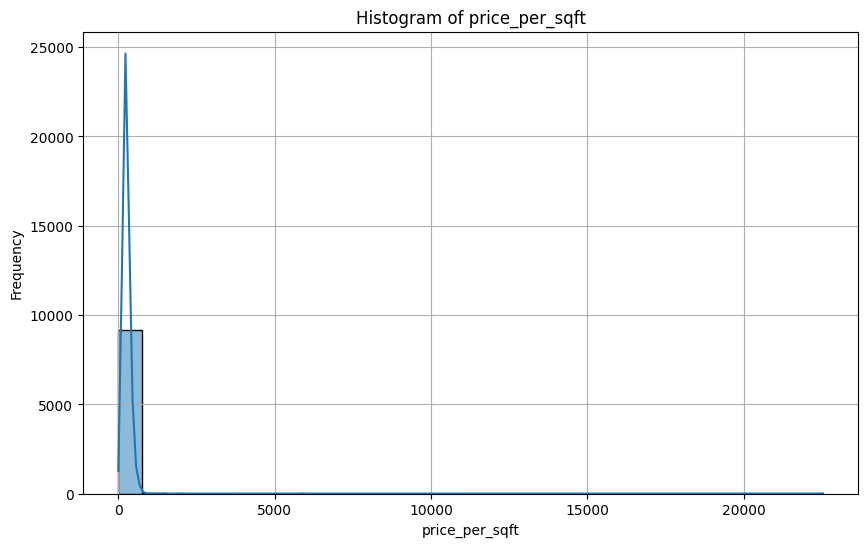

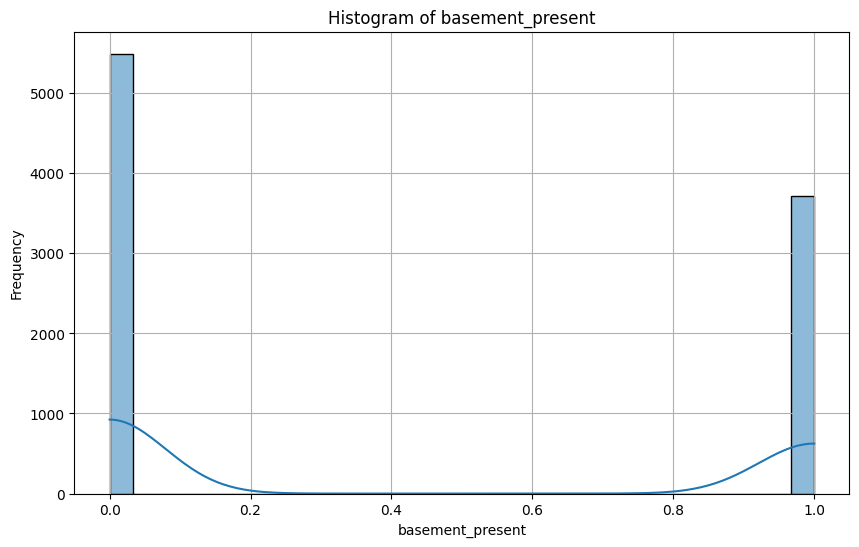

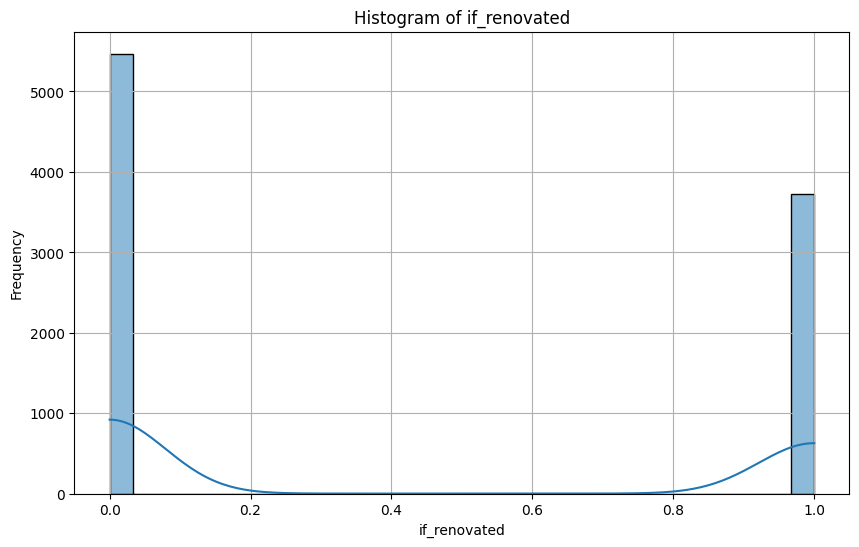

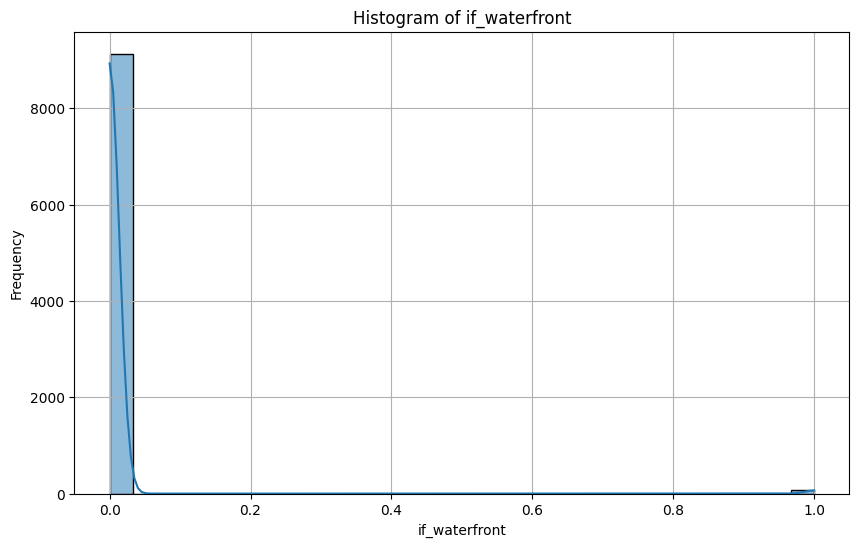

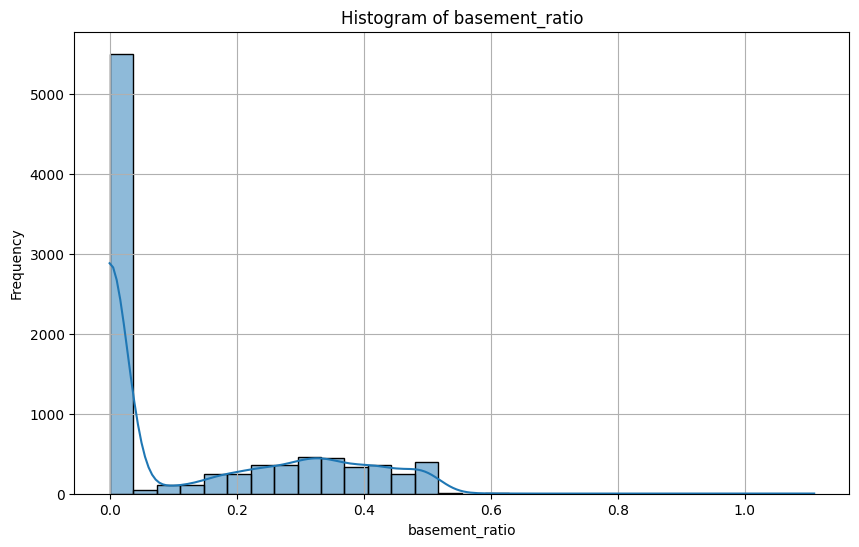

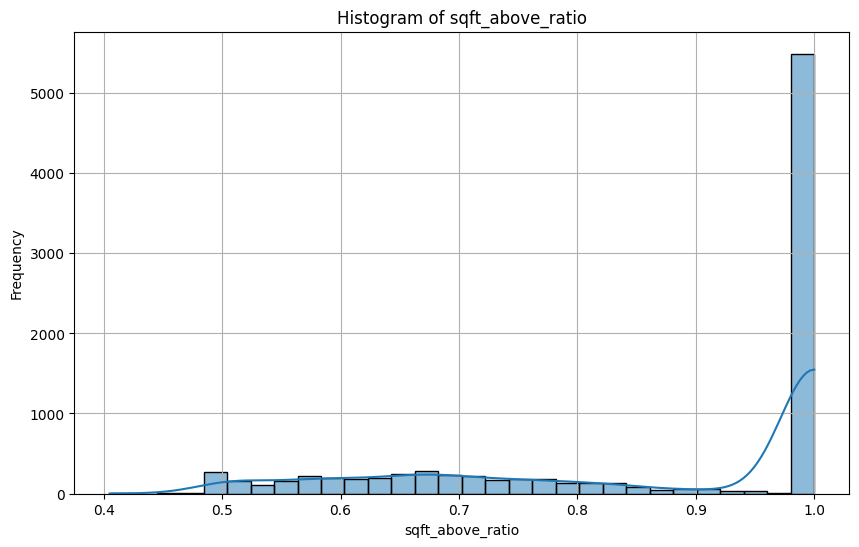

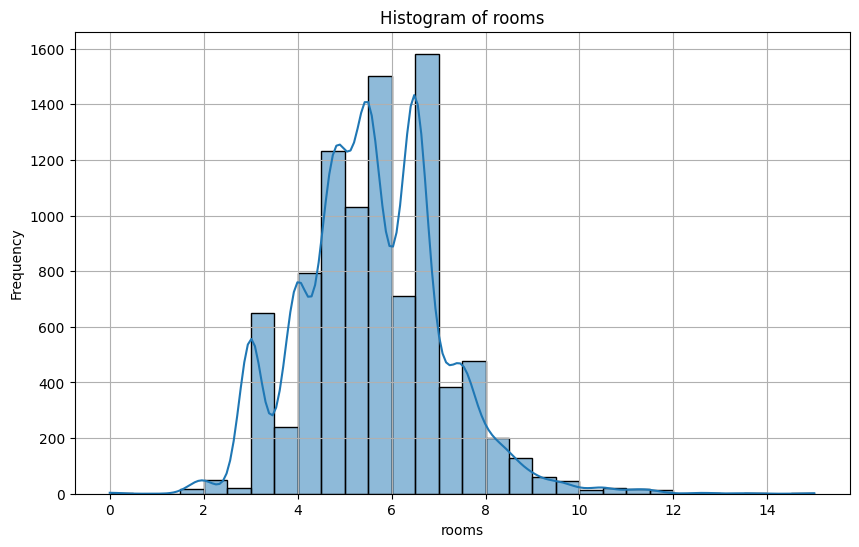

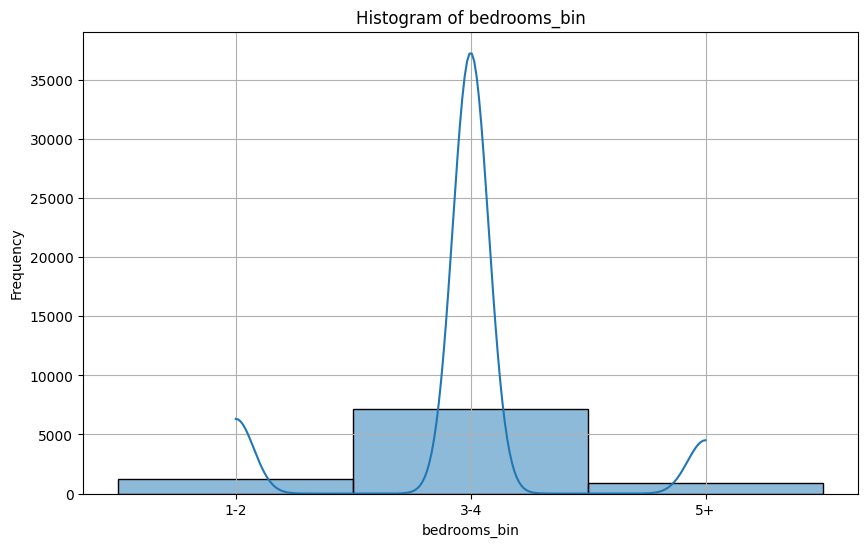

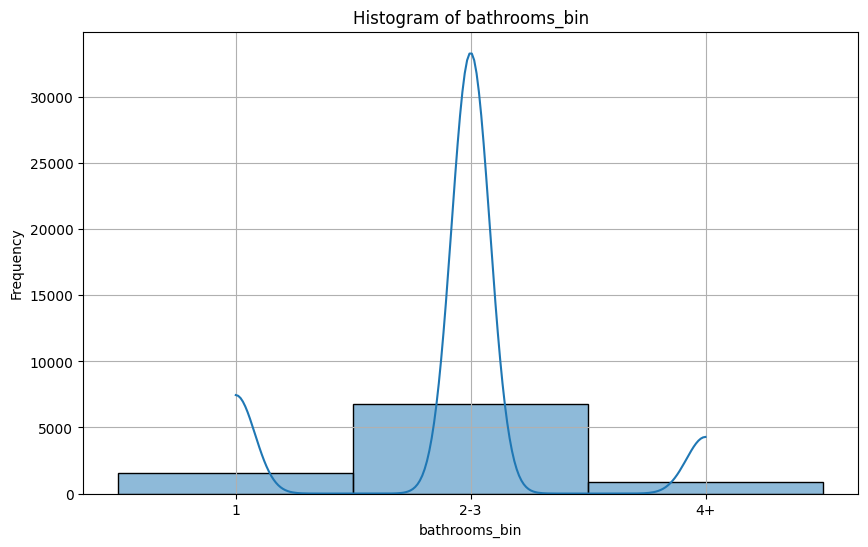

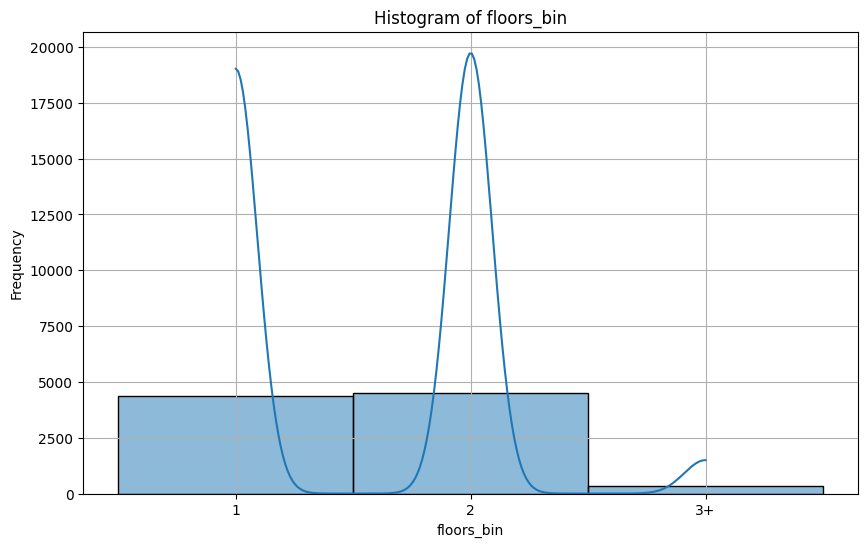

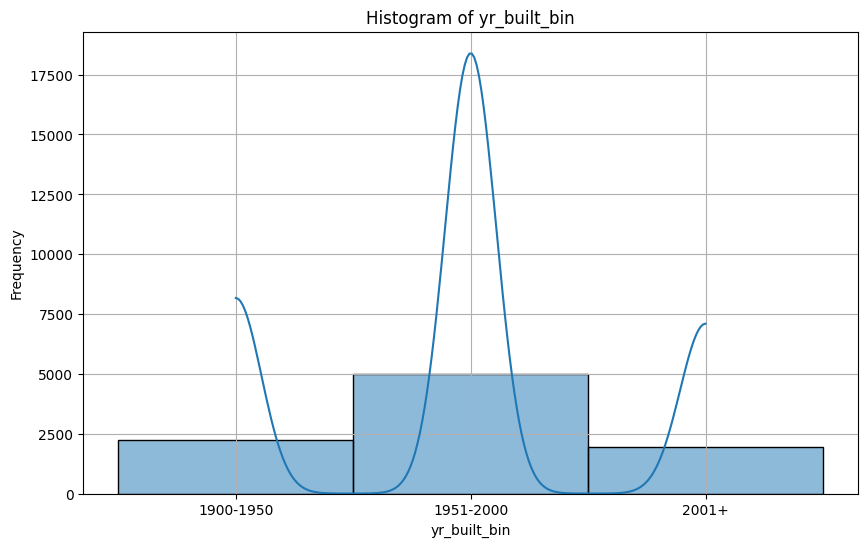

ValueError: arange: cannot compute length

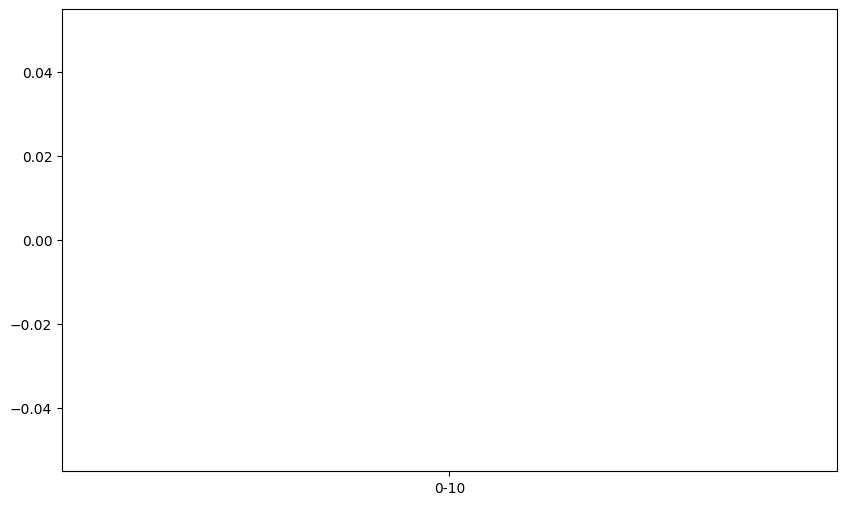

In [76]:
#筛选所有数据类型不是object的列
numeric_columns = data.select_dtypes(exclude=['object']).columns
#对所有筛选列画直方图
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

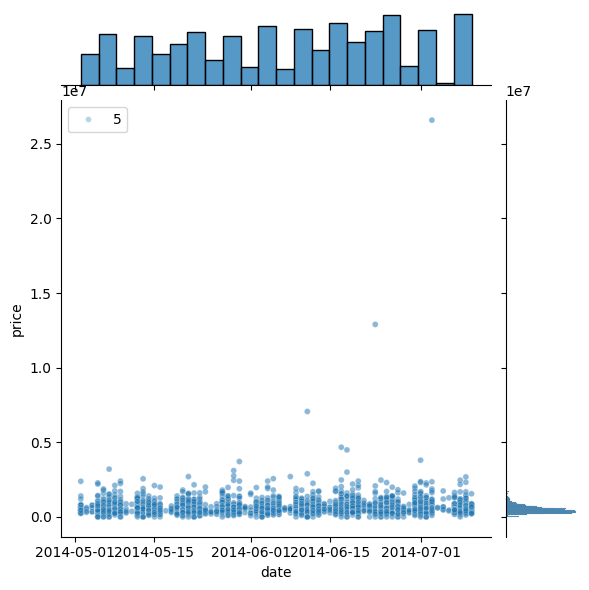

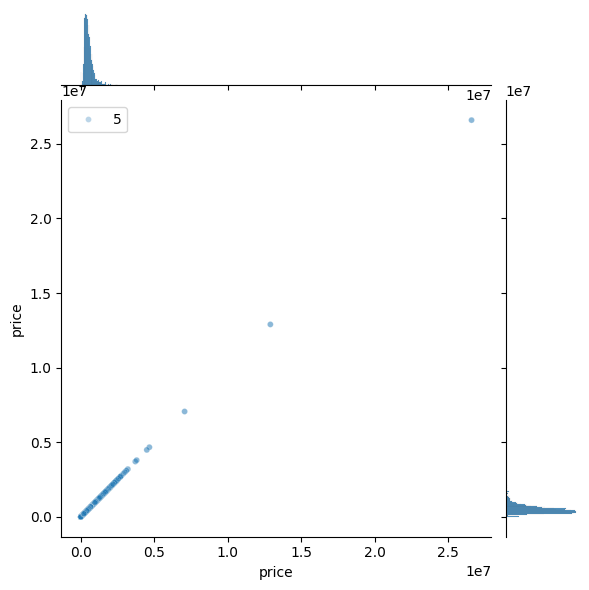

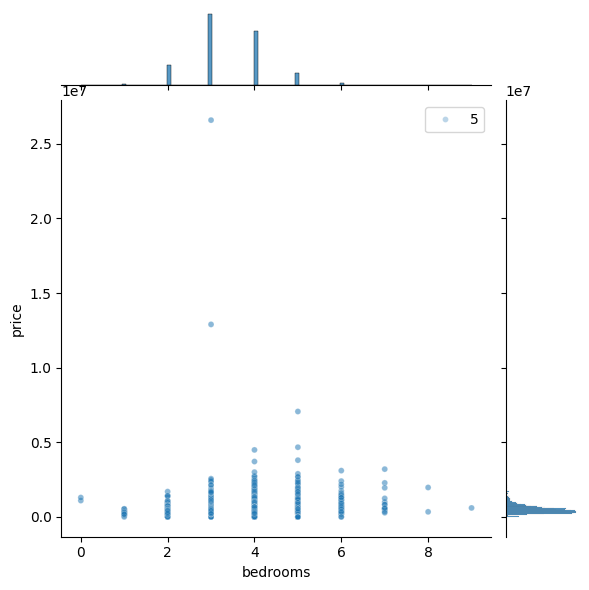

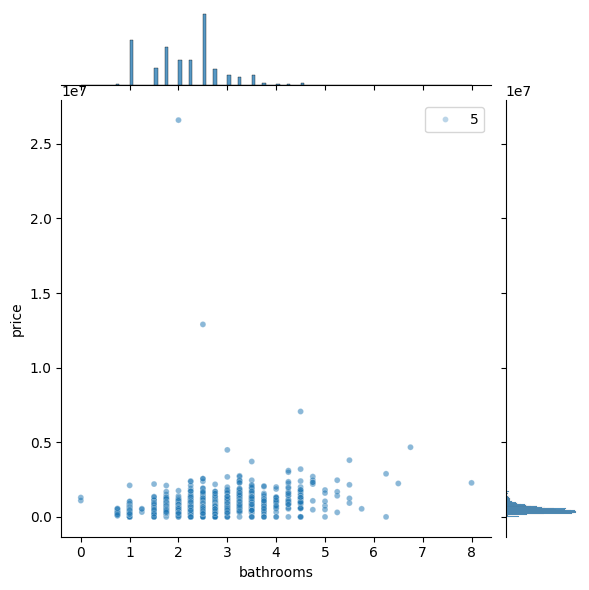

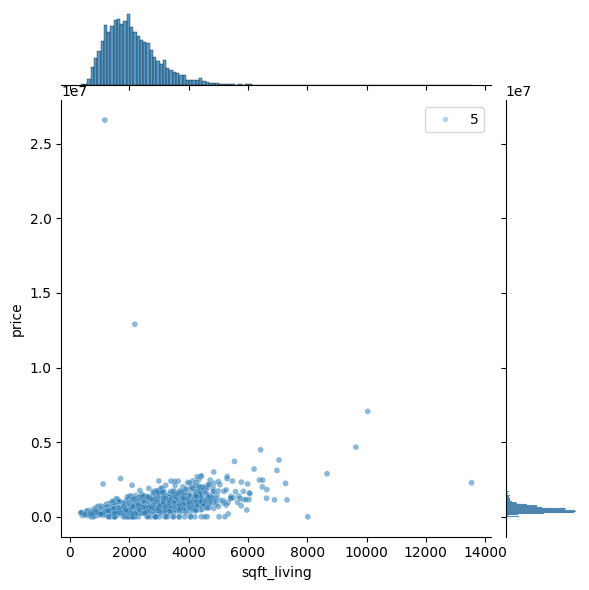

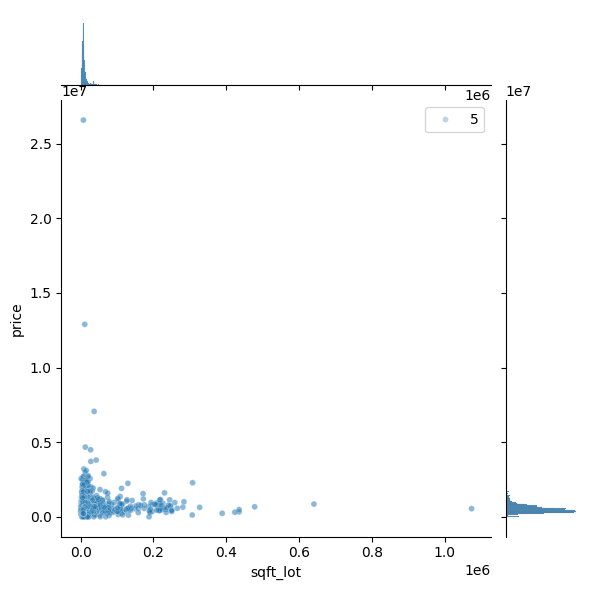

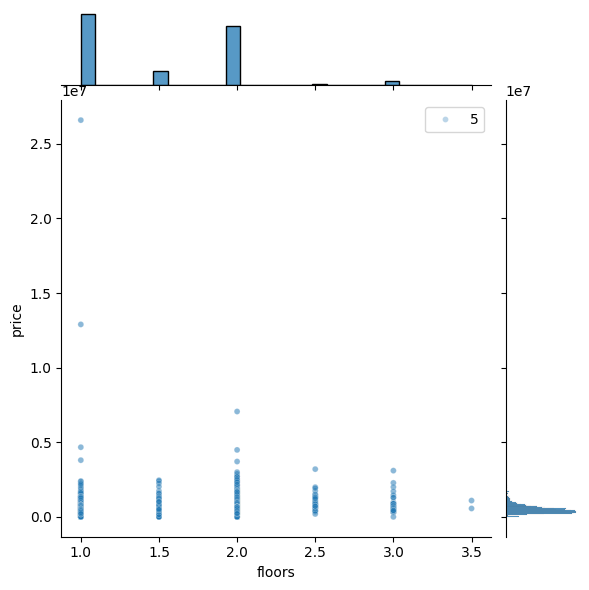

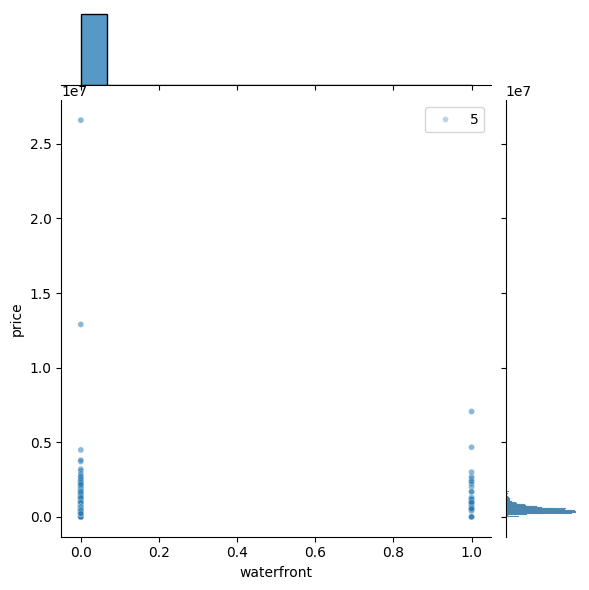

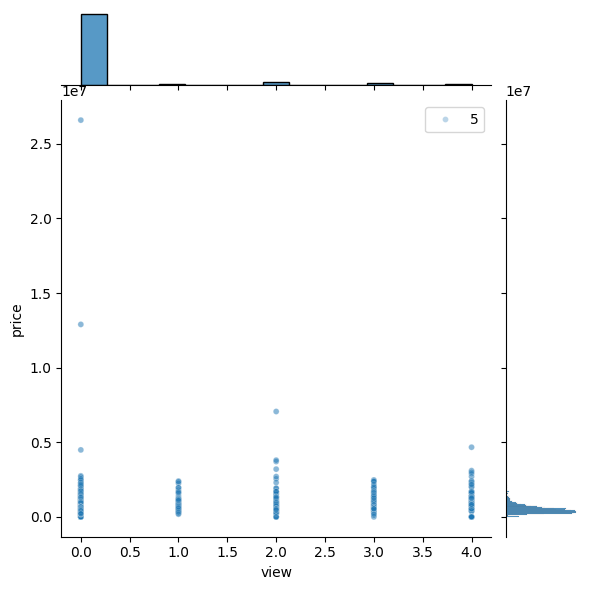

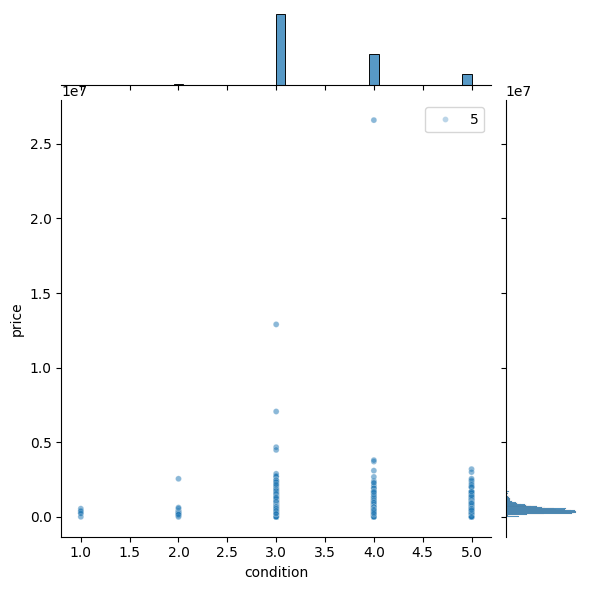

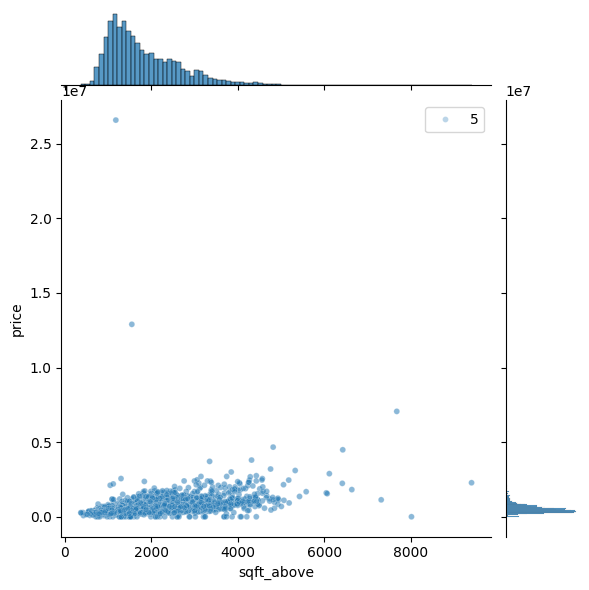

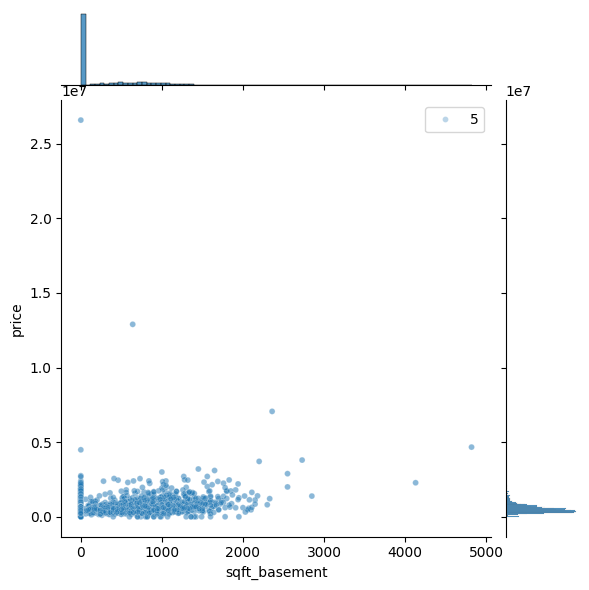

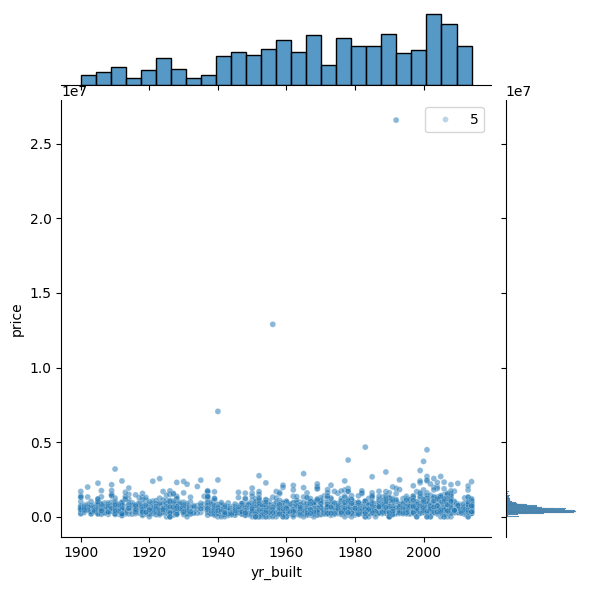

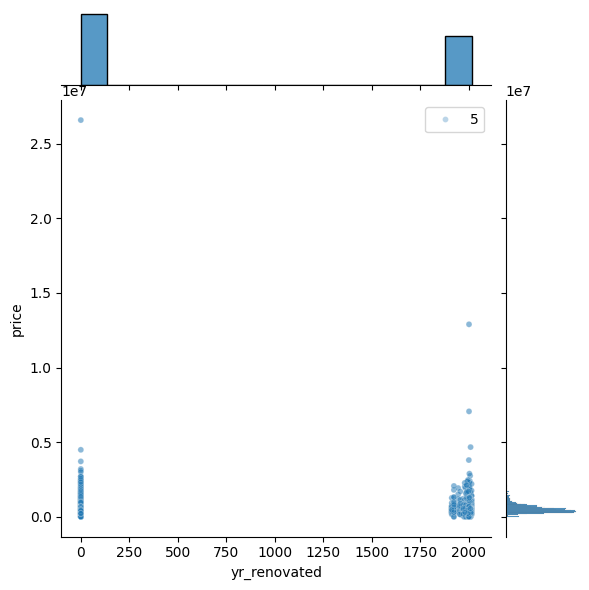

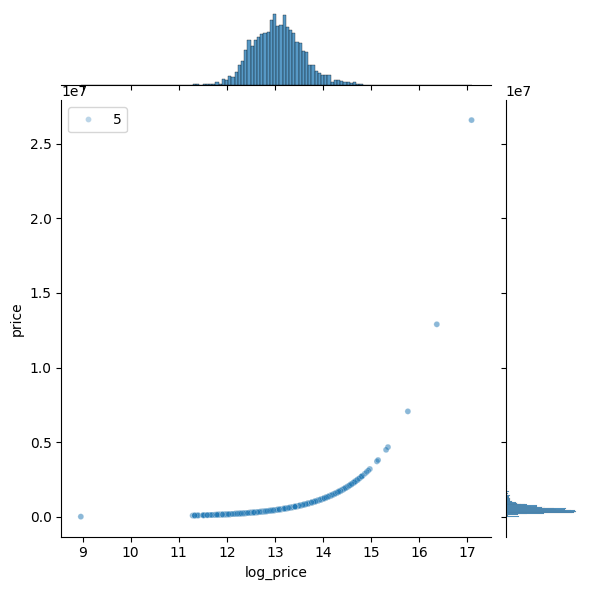

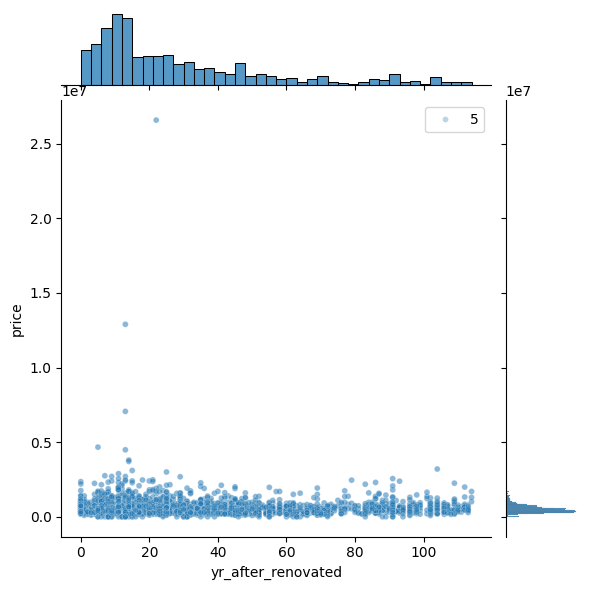

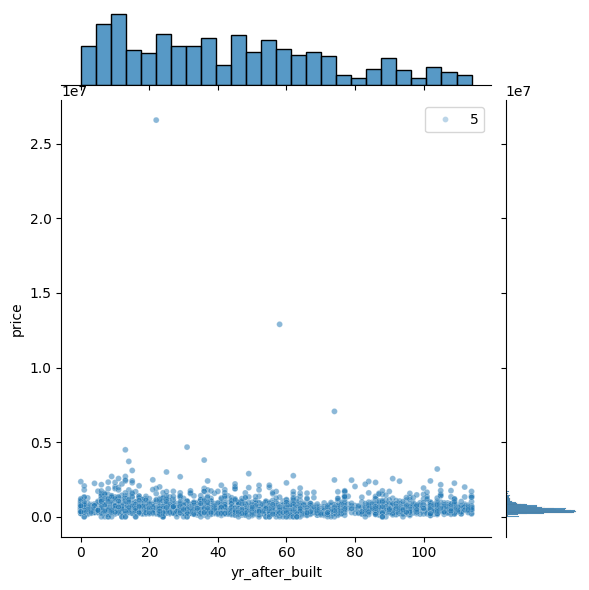

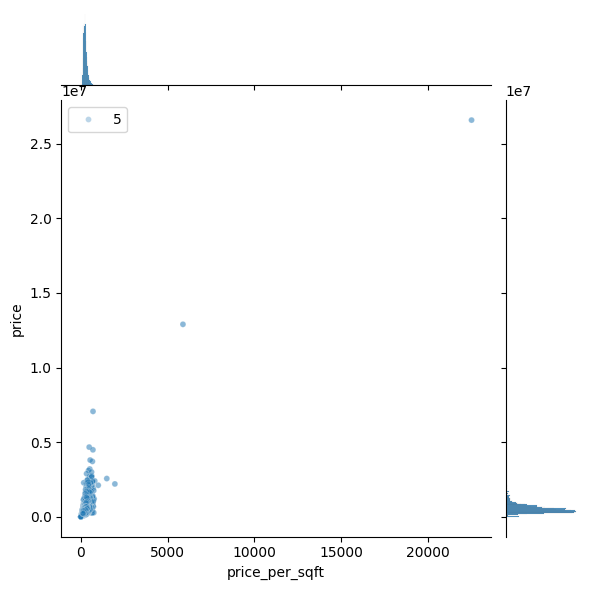

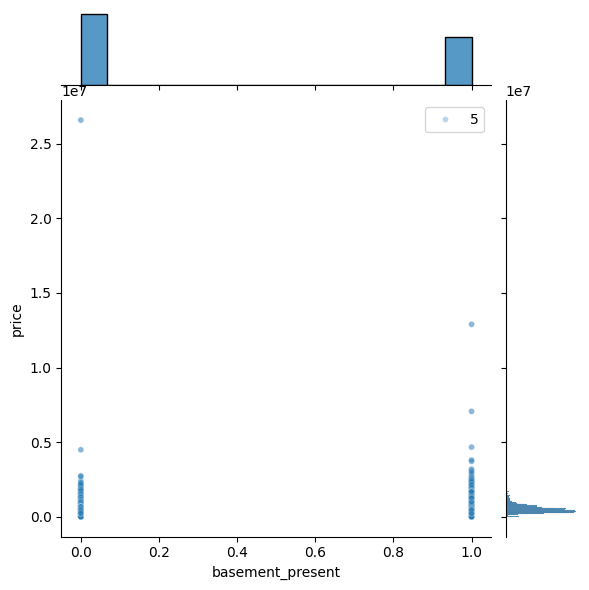

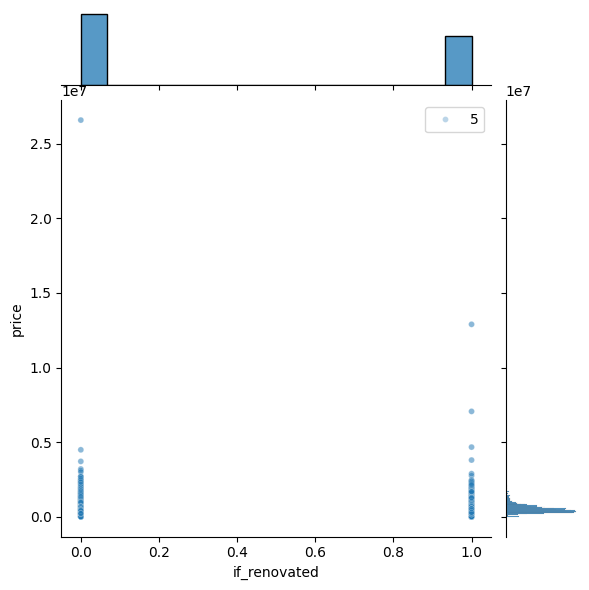

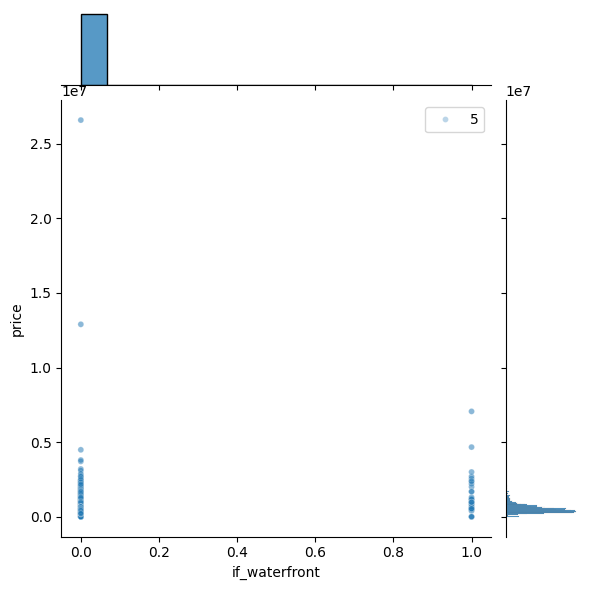

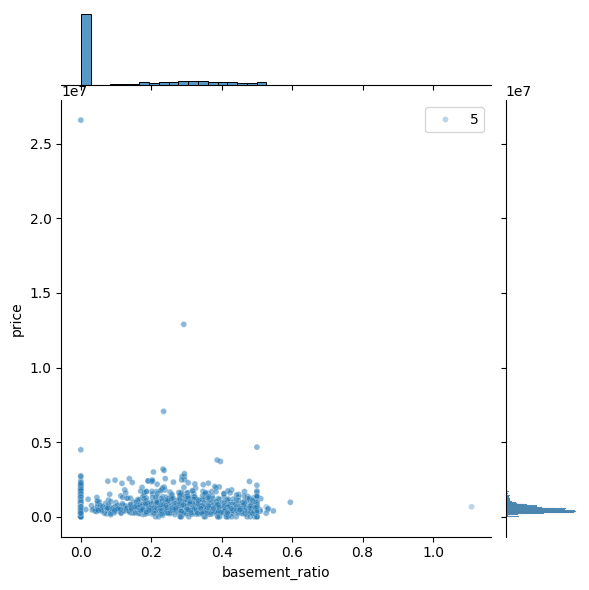

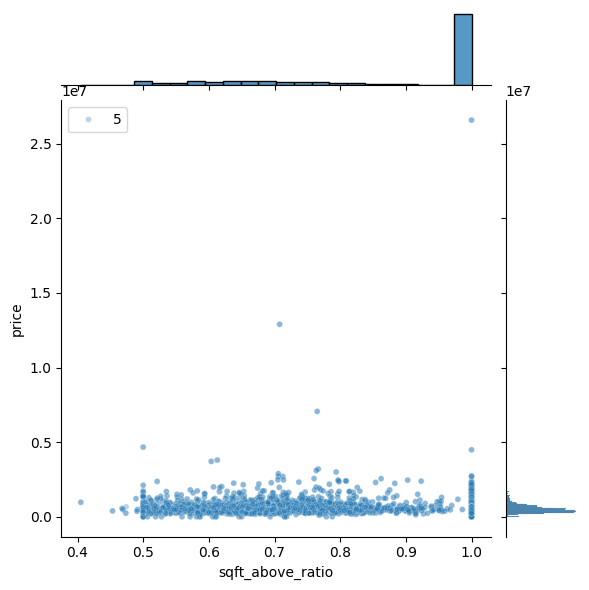

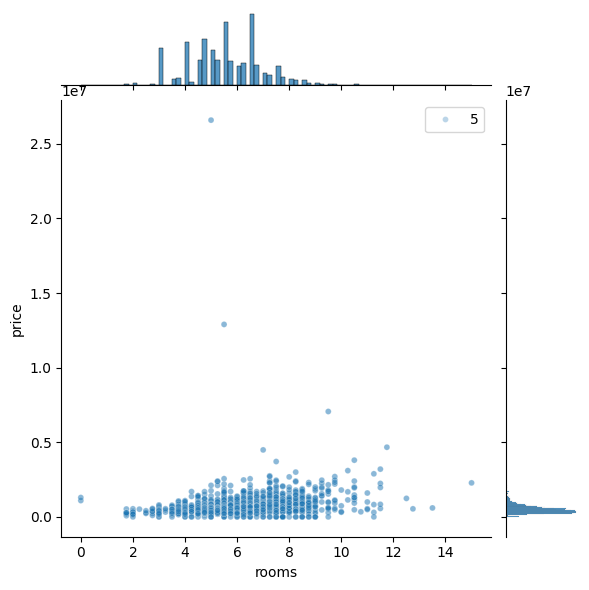

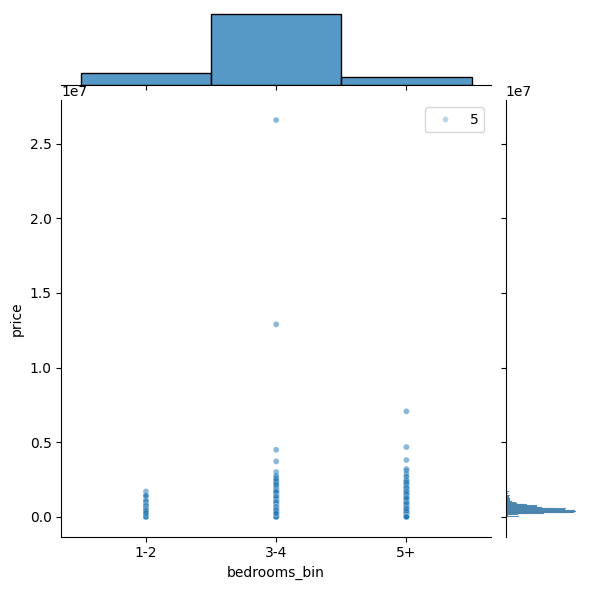

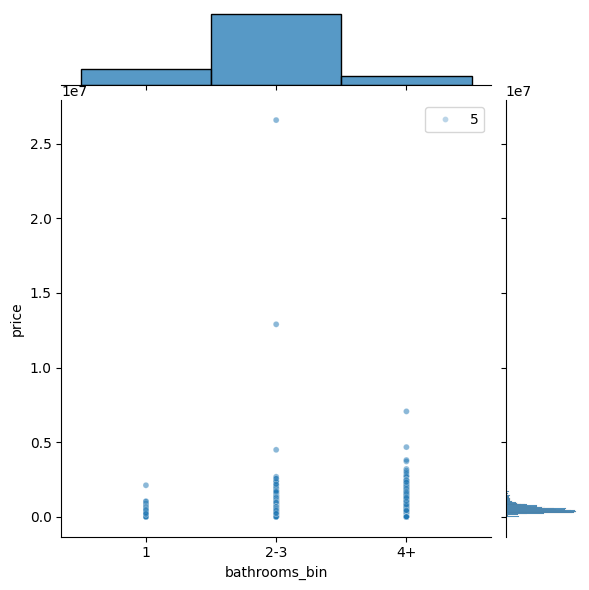

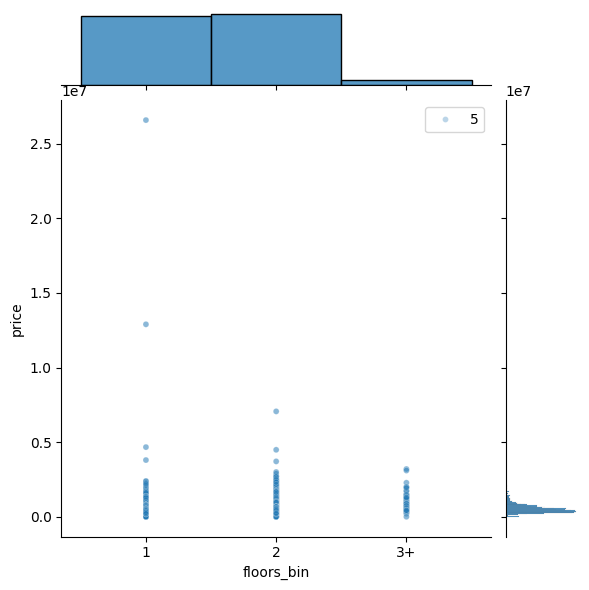

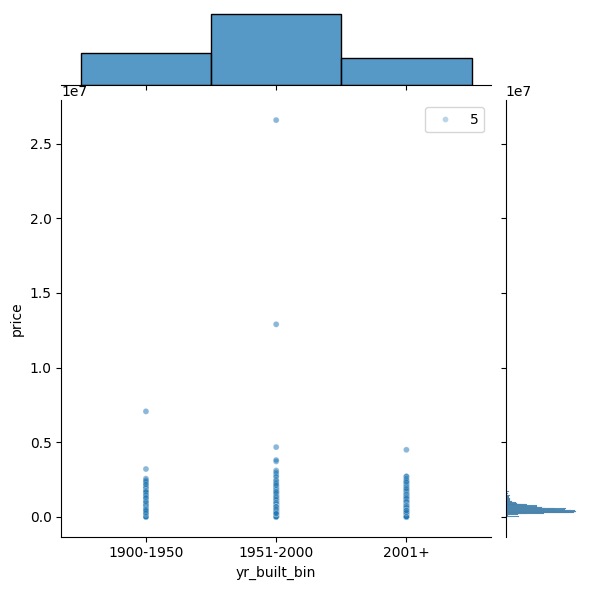

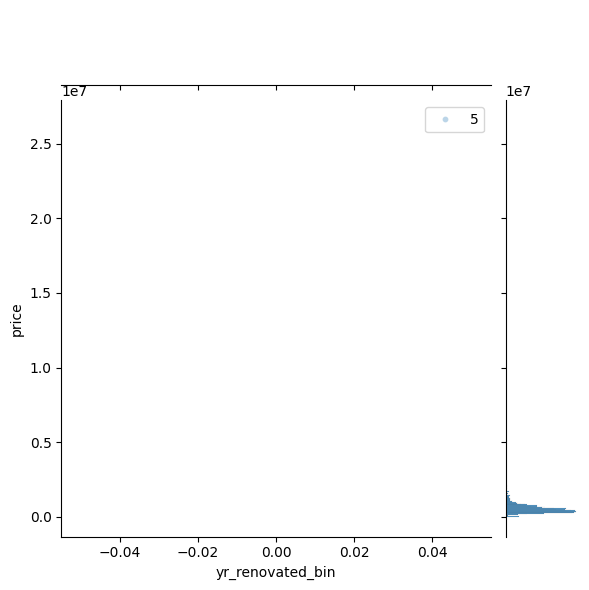

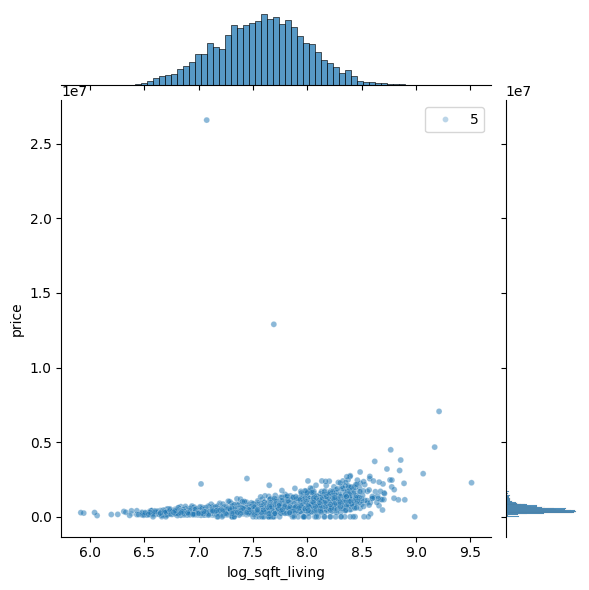

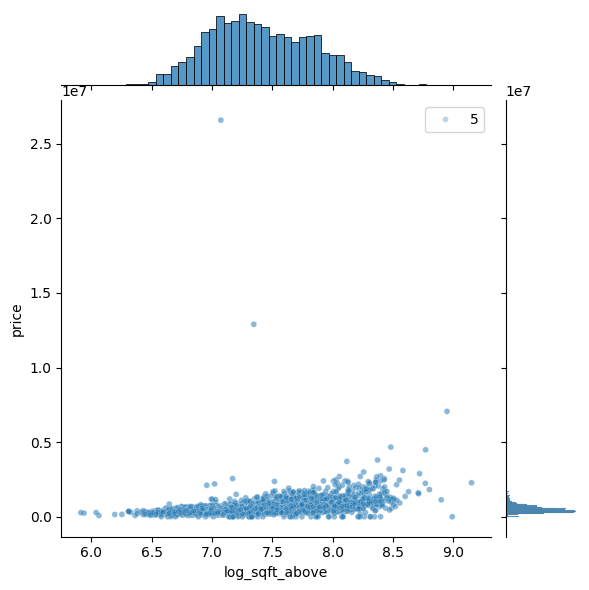

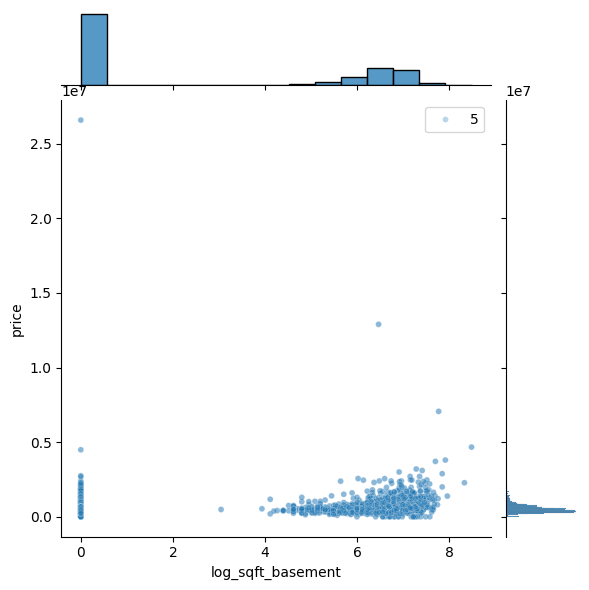

In [77]:
# alpa表示散点透明度，size表示图的大小
for col in numeric_columns:
    sns.jointplot(x=col, y="price", data=data, alpha=0.3, size=5)

In [78]:
data[numeric_columns].corr()['price'].sort_values(ascending=False).plot.barh(figsize=(12,6),title='Variable Correlation with Price')

ValueError: could not convert string to float: '3-4'